# Preparing the Dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [2]:
import os
import zipfile

# Uploading Kaggle API Key
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# Creating the .kaggle directory if it does not exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Moving the uploaded kaggle.json file to the correct directory
!mv /content/kaggle.json /root/.kaggle/

# Downloading the Dataset
!kaggle datasets download -d prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed

# Unzipping the dataset
with zipfile.ZipFile('/content/cervical-cancer-largest-dataset-sipakmed.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/si_pak_med')

mv: cannot stat '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed
License(s): other
100% 6.40G/6.40G [07:15<00:00, 15.3MB/s]
100% 6.40G/6.40G [07:15<00:00, 15.8MB/s]


# Importing Dependencies

In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Imaging Preprocessing

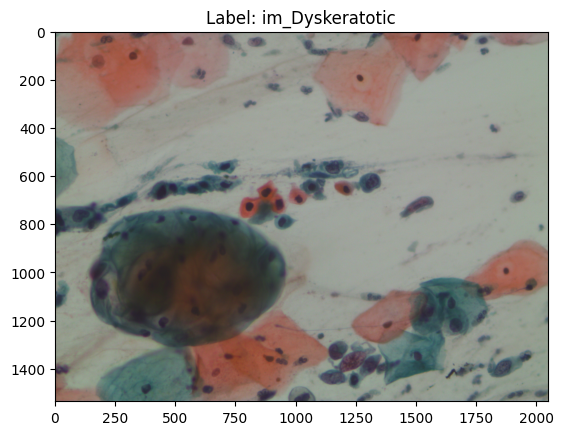

Image Size: (2048, 1536)


In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Loading dataset without transformations for inspection
raw_dataset = datasets.ImageFolder(root='/content/si_pak_med')

# Function to show sample image and size
def show_sample_image(dataset, index):
    image, label = dataset[index]
    plt.imshow(image)  # Directly showing PIL image
    plt.title(f"Label: {dataset.classes[label]}")
    plt.show()
    print(f"Image Size: {image.size}")

# Showing a sample image and its size
show_sample_image(raw_dataset, 0)


In [5]:
from PIL import Image
import os

dataset_path = '/content/si_pak_med'

# Check the formats of the images
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                print(f"File: {file_path}, Format: {img.format}")

Streaming output truncated to the last 5000 lines.
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/041.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/026.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/052.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/107.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/084.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/029.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/034.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/102.bmp, Format: BMP
File: /content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate/057.bmp, Format: BMP
File: /content/si_pak_

In [6]:
from PIL import Image
import os

dataset_path = '/content/si_pak_med'

# Check the formats of the images
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.dat')):
            file_path = os.path.join(root, file)
            try:
                # Try to open the image file
                with Image.open(file_path) as img:
                    print(f"File: {file_path}, Format: {img.format}")
            except IOError:
                print(f"Cannot open file: {file_path}")
            except Exception as e:
                print(f"Error with file: {file_path}. Exception: {e}")

Streaming output truncated to the last 5000 lines.
Cannot open file: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/034_07_nuc.dat
Cannot open file: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/095_09_cyt.dat
File: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/009_06.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/062_11.bmp, Format: BMP
Cannot open file: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/095_12_cyt.dat
File: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/060_01.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/064_02.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/052_09.bmp, Format: BMP
Cannot open file: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/065_03_nuc.dat
Cannot open file: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/074_02_nuc.dat
Cannot open file: /content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/076_03_cyt.dat
File: /

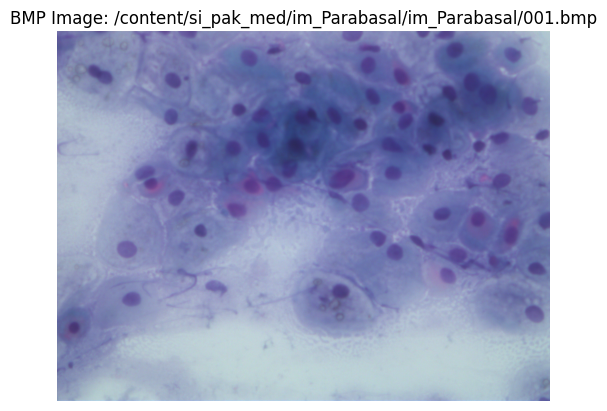

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def display_bmp_image(file_path):
    try:
        # Open the BMP image
        img = Image.open(file_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.title(f'BMP Image: {file_path}')
        plt.axis('off')
        plt.show()

    except IOError:
        print(f"Cannot open BMP file: {file_path}")

# Example usage
# bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/075.bmp'
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001.bmp'
display_bmp_image(bmp_file_path)

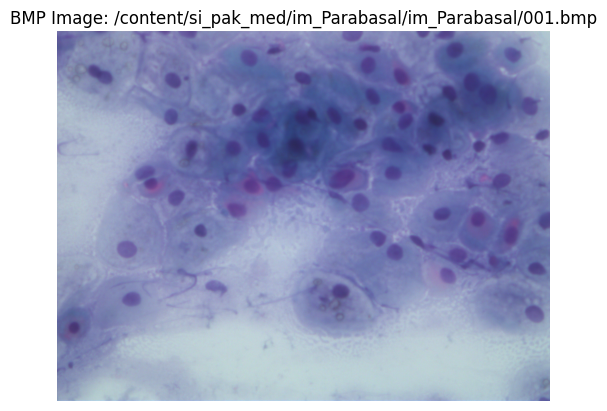

In [8]:
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001.bmp'
display_bmp_image(bmp_file_path)

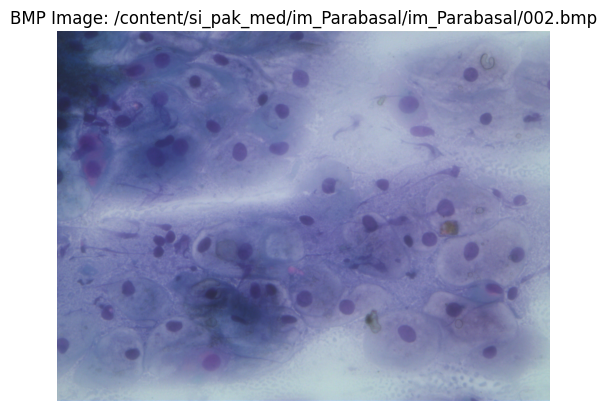

In [9]:
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/002.bmp'
display_bmp_image(bmp_file_path)

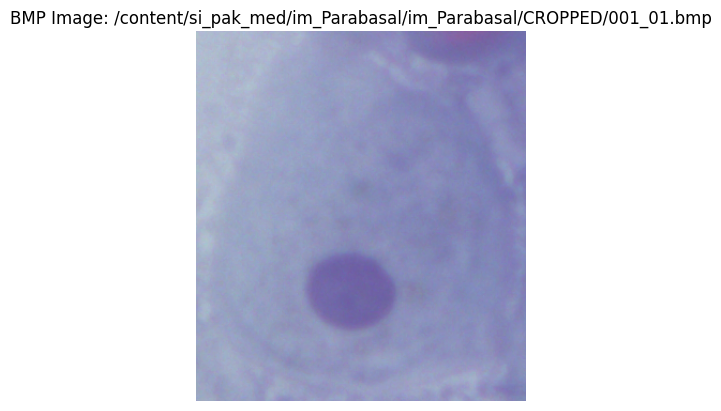

In [10]:
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/001_01.bmp'
display_bmp_image(bmp_file_path)

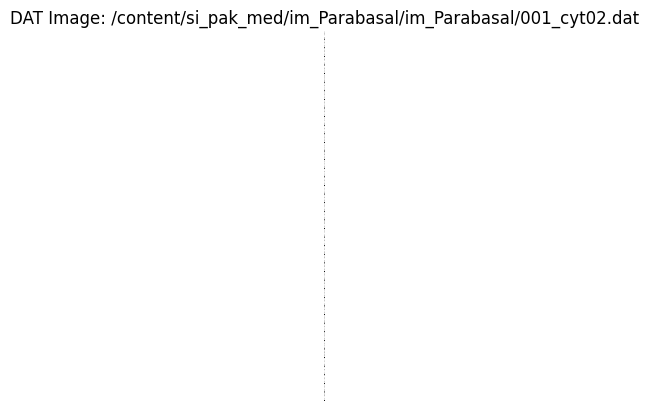

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_dat_image(file_path):
    try:
        # Read the raw data from the .dat file
        with open(file_path, 'rb') as f:
            data = f.read()

        # Convert the raw data to a numpy array
        # For grayscale images, use dtype=np.uint8. Adjust if necessary.
        image_array = np.frombuffer(data, dtype=np.uint8)

        # Display the raw data as an image
        # Note: If the data isn't in an image format you can display directly,
        # you will need to adapt this part of the code to handle that format.
        # For demonstration, assuming the raw data is suitable for display.
        img = Image.fromarray(image_array, 'L')  # 'L' mode is for grayscale images

        # Display the image using matplotlib
        plt.imshow(img, cmap='gray')
        plt.title(f'DAT Image: {file_path}')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error with DAT file: {file_path}. Exception: {e}")

# Example usage
dat_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001_cyt02.dat'
display_dat_image(dat_file_path)

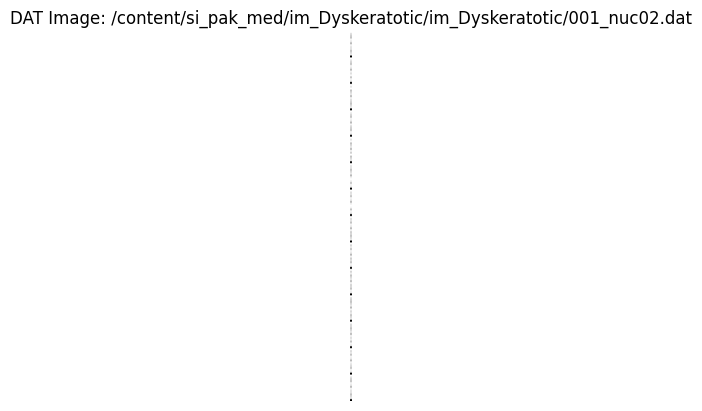

In [12]:
dat_file_path = '/content/si_pak_med/im_Dyskeratotic/im_Dyskeratotic/001_nuc02.dat'
display_dat_image(dat_file_path)

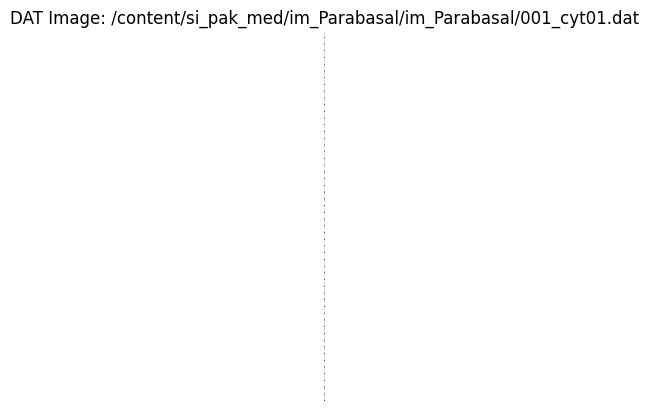

In [13]:
dat_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001_cyt01.dat'
display_dat_image(dat_file_path)

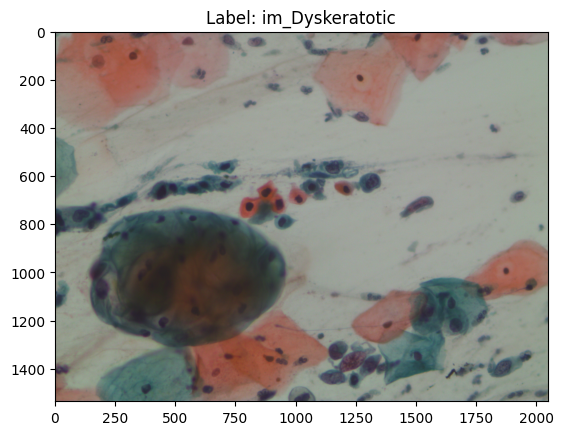

Image Size: (2048, 1536)


In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets

# Loading dataset without transformations for inspection
raw_dataset = datasets.ImageFolder(root='/content/si_pak_med')

# Function to show sample image and size
def show_sample_image(dataset, index):
    # Extract image and label
    image, label = dataset[index]

    # Convert tensor to a PIL Image if necessary (for image size extraction)
    if not isinstance(image, Image.Image):  # Check if image is already a PIL image
        image = Image.fromarray(image.numpy())  # Convert the tensor to a NumPy array and then to a PIL image

    # Show the image using matplotlib
    plt.imshow(image)
    plt.title(f"Label: {dataset.classes[label]}")
    plt.show()

    # Print image size
    print(f"Image Size: {image.size}")

# Showing a sample image and its size
show_sample_image(raw_dataset, 0)

# Creating Folders for Only BMP format

In [15]:
import shutil

def create_bmp_folder(input_folder, output_folder):
    ''' this function enables extraction of the .bmp files from the dataset folder '''
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith('.bmp'):
        # Construct full file path
            file_path = os.path.join(input_folder, filename)
        # Move .bmp file to destination directory
            shutil.move(file_path, output_folder)

create_bmp_folder('/content/si_pak_med/im_Dyskeratotic/im_Dyskeratotic', '/content/si_pak_med/main_im_Dyskeratotic')
create_bmp_folder('/content/si_pak_med/im_Koilocytotic/im_Koilocytotic', '/content/si_pak_med/main_im_Koilocytotic')
create_bmp_folder('/content/si_pak_med/im_Metaplastic/im_Metaplastic', '/content/si_pak_med/main_im_Metaplastic')
create_bmp_folder('/content/si_pak_med/im_Parabasal/im_Parabasal', '/content/si_pak_med/main_im_Parabasal')
create_bmp_folder('/content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate', '/content/si_pak_med/main_im_Superficial-Intermediate')

# Data Preprocessing



In [16]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Defining paths for normal and abnormal categories
normal_dirs = [
    '/content/si_pak_med/main_im_Superficial-Intermediate',
    '/content/si_pak_med/main_im_Metaplastic'
]
abnormal_dirs = [
    '/content/si_pak_med/main_im_Dyskeratotic',
    '/content/si_pak_med/main_im_Koilocytotic',
    '/content/si_pak_med/main_im_Parabasal'
]

# Function to label the dataset as normal and abnormal
def label_dataset(base_dirs, label):
    labeled_images = []
    for dir in base_dirs:
        for image in os.listdir(dir):
            image_path = os.path.join(dir, image)
            if image.endswith(".bmp"):  # Ensure it's an image
                labeled_images.append((image_path, label))
    return labeled_images

# Labelling datasets (normal = 0, abnormal = 1)
normal_images = label_dataset(normal_dirs, 0)
abnormal_images = label_dataset(abnormal_dirs, 1)

# Combining all images
all_images = normal_images + abnormal_images

# Shuffling the dataset
import random
random.shuffle(all_images)

# Delete Irrelevant Folders

In [17]:
for folders in os.listdir('/content/si_pak_med'): # delete folders not starting with main
  if folders.startswith('im'):
    !rm -rf /content/si_pak_med/$folders

# Loading and Transforming Images

In [18]:
from torch.utils.data import random_split, DataLoader
import random
from PIL import Image
from torch.utils.data import Dataset

class CervicalDataset(Dataset):
    def __init__(self, image_list, transform=None):
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path, label = self.image_list[idx]
        image = Image.open(image_path).convert('RGB')  # Convert to RGB
        if self.transform:
            image = self.transform(image)
        return image, label

# Defining Transformations with additional augmentations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random resized crop
    transforms.RandomHorizontalFlip(),                      # Random horizontal flip
    transforms.RandomVerticalFlip(),                        # Random vertical flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.RandomRotation(10),                          # Random rotation by 10 degrees
    transforms.ToTensor(),                                  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],      # Normalization based on ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


# Creating dataset from the labeled images
dataset = CervicalDataset(all_images, transform=transform)

# Defining split sizes
train_size = int(0.7 * len(dataset))  # 70% for training
val_size = len(dataset) - train_size  # 30% for validation
#test_size = len(dataset) - train_size - val_size  # Remaining 15% for testing

# Splitting the dataset
train_dataset, val_dataset= random_split(dataset, [train_size, val_size])

# Creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Checking the sizes
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
# print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 676
Validation set size: 290


# Building a Simple Neural Network

In [ ]:
import torch.nn as nn
import torch.optim as optim

# SimpleCNN with dropout added
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)  # Adjusting dimensions based on input size
        self.fc2 = nn.Linear(128, 2)  # 2 output classes: normal, abnormal
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% probability

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)  # Flattening the tensor
        x = self.dropout(torch.relu(self.fc1(x)))  # Applying dropout
        x = self.fc2(x)
        return x

# Initializing the network, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Increased weight decay

# Training The Model

In [ ]:
import torch

# Training function with early stopping and accuracy calculation
def train(model, train_loader, val_loader, criterion, optimizer, epochs=10, patience=3):
    model.train()
    min_val_loss = float('inf')
    no_improvement_epochs = 0

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training phase
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Validation phase
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # Average losses
        train_loss = running_loss / len(train_loader)
        val_loss /= len(val_loader)

        # Calculate accuracy percentages
        train_accuracy = 100 * correct_train / total_train
        val_accuracy = 100 * correct_val / total_val

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Early stopping
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping triggered")
            break

        model.train()

# Training the model with early stopping
train(model, train_loader, val_loader, criterion, optimizer, epochs=10, patience=3)

Epoch [1/10], Train Loss: 2.6242, Train Accuracy: 58.14%, Val Loss: 0.5678, Val Accuracy: 73.45%
Epoch [2/10], Train Loss: 0.5699, Train Accuracy: 71.30%, Val Loss: 0.5396, Val Accuracy: 71.72%
Epoch [3/10], Train Loss: 0.5251, Train Accuracy: 70.41%, Val Loss: 0.5006, Val Accuracy: 74.83%
Epoch [4/10], Train Loss: 0.5151, Train Accuracy: 72.49%, Val Loss: 0.4739, Val Accuracy: 74.48%
Epoch [5/10], Train Loss: 0.5018, Train Accuracy: 74.26%, Val Loss: 0.4720, Val Accuracy: 76.55%
Epoch [6/10], Train Loss: 0.4971, Train Accuracy: 74.56%, Val Loss: 0.4147, Val Accuracy: 77.24%
Epoch [7/10], Train Loss: 0.4831, Train Accuracy: 76.92%, Val Loss: 0.4174, Val Accuracy: 76.21%
Epoch [8/10], Train Loss: 0.4897, Train Accuracy: 76.63%, Val Loss: 0.4315, Val Accuracy: 77.93%
Epoch [9/10], Train Loss: 0.4688, Train Accuracy: 74.70%, Val Loss: 0.3998, Val Accuracy: 74.83%
Epoch [10/10], Train Loss: 0.4546, Train Accuracy: 76.18%, Val Loss: 0.4430, Val Accuracy: 78.97%


In [ ]:
import torch

# Training function with early stopping and accuracy tracking
def train(model, train_loader, val_loader, criterion, optimizer, epochs=10, patience=3):
    model.train()
    min_val_loss = float('inf')
    no_improvement_epochs = 0

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training step
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Track training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Validation step
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Track validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        train_loss = running_loss / len(train_loader)

        train_accuracy = 100 * correct_train / total_train
        val_accuracy = 100 * correct_val / total_val

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Early stopping logic
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping triggered")
            break

        model.train()

# Evaluation function for accuracy
def evaluate(model, data_loader, dataset_name):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'{dataset_name} Accuracy: {accuracy:.2f}%')
    return accuracy

# Training the model with early stopping
train(model, train_loader, val_loader, criterion, optimizer, epochs=10, patience=3)

# Evaluating the model
evaluate(model, train_loader, 'Training')
evaluate(model, val_loader, 'Validation')

Epoch [1/10], Train Loss: 0.4505, Train Accuracy: 77.81%, Val Loss: 0.4870, Val Accuracy: 73.10%
Epoch [2/10], Train Loss: 0.5411, Train Accuracy: 71.60%, Val Loss: 0.4460, Val Accuracy: 77.59%
Epoch [3/10], Train Loss: 0.4860, Train Accuracy: 76.18%, Val Loss: 0.4216, Val Accuracy: 76.90%
Epoch [4/10], Train Loss: 0.4680, Train Accuracy: 75.89%, Val Loss: 0.4902, Val Accuracy: 77.24%
Epoch [5/10], Train Loss: 0.4486, Train Accuracy: 77.51%, Val Loss: 0.3834, Val Accuracy: 78.97%
Epoch [6/10], Train Loss: 0.4723, Train Accuracy: 76.63%, Val Loss: 0.4017, Val Accuracy: 76.90%
Epoch [7/10], Train Loss: 0.4377, Train Accuracy: 77.37%, Val Loss: 0.3953, Val Accuracy: 77.24%
Epoch [8/10], Train Loss: 0.4582, Train Accuracy: 74.85%, Val Loss: 0.4116, Val Accuracy: 76.90%
Early stopping triggered
Training Accuracy: 76.33%
Validation Accuracy: 78.28%


78.27586206896552

In [ ]:
# Evaluating the model
evaluate(model, train_loader, 'Training')
evaluate(model, val_loader, 'Validation')

Training Accuracy: 74.85%
Validation Accuracy: 77.59%


77.58620689655173

# Model Evaluation

In [ ]:
# Evaluation function
def evaluate(model, data_loader, dataset_name):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'{dataset_name} Accuracy: {accuracy:.2f}%')

# Evaluating the model on training, validation, and test sets
evaluate(model, train_loader, 'Training')
evaluate(model, val_loader, 'Validation')

Training Accuracy: 89.79%
Validation Accuracy: 82.07%


# Pretrained Model with Transfer Learning

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Use a pretrained ResNet model with modifications
class PretrainedModel(nn.Module):
    def __init__(self):
        super(PretrainedModel, self).__init__()
        # Load the pre-trained ResNet model
        self.model = models.resnet18(pretrained=True)

        # Freeze the early layers (optional, can be adjusted based on requirements)
        for param in self.model.parameters():
            param.requires_grad = False

        # Modify the fully connected layer to match the number of classes (2: normal and abnormal)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),  # Adding dropout
            nn.Linear(256, 2)  # 2 output classes
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = PretrainedModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [21]:
import torch

# Training function with early stopping and accuracy calculation
def train(model, train_loader, val_loader, criterion, optimizer, epochs=10, patience=3):
    model.train()
    min_val_loss = float('inf')
    no_improvement_epochs = 0

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training phase
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to the device (GPU/CPU)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Validation phase
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)  # Move data to the device (GPU/CPU)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # Average losses
        train_loss = running_loss / len(train_loader)
        val_loss /= len(val_loader)

        # Calculate accuracy percentages
        train_accuracy = 100 * correct_train / total_train
        val_accuracy = 100 * correct_val / total_val

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Early stopping
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping triggered")
            break

        model.train()

# Move the model to the appropriate device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training the model with early stopping
train(model, train_loader, val_loader, criterion, optimizer, epochs=10, patience=3)

Epoch [1/10], Train Loss: 0.6743, Train Accuracy: 62.13%, Val Loss: 0.4780, Val Accuracy: 78.28%
Epoch [2/10], Train Loss: 0.4855, Train Accuracy: 76.33%, Val Loss: 0.4080, Val Accuracy: 82.41%
Epoch [3/10], Train Loss: 0.4404, Train Accuracy: 82.10%, Val Loss: 0.4195, Val Accuracy: 83.79%
Epoch [4/10], Train Loss: 0.4473, Train Accuracy: 78.25%, Val Loss: 0.3492, Val Accuracy: 84.83%
Epoch [5/10], Train Loss: 0.4536, Train Accuracy: 79.73%, Val Loss: 0.3557, Val Accuracy: 85.17%
Epoch [6/10], Train Loss: 0.4461, Train Accuracy: 81.21%, Val Loss: 0.4335, Val Accuracy: 85.17%
Epoch [7/10], Train Loss: 0.4966, Train Accuracy: 80.03%, Val Loss: 0.5066, Val Accuracy: 81.03%
Early stopping triggered


## Updated Training Code with Learning Rate Scheduler and Unfreezing Layers

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Use a pretrained ResNet model with more layers unfrozen and modifications
class PretrainedModel(nn.Module):
    def __init__(self):
        super(PretrainedModel, self).__init__()
        # Load the pre-trained ResNet model
        self.model = models.resnet18(pretrained=True)

        # Unfreeze the last two blocks of the model for fine-tuning
        for name, param in self.model.named_parameters():
            if 'layer4' in name or 'layer3' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False

        # Modify the fully connected layer to match the number of classes (2: normal and abnormal)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),  # Adding dropout
            nn.Linear(256, 2)  # 2 output classes
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = PretrainedModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)  # Lower initial learning rate

# Learning rate scheduler to decrease learning rate if no improvement
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Training function with learning rate scheduler and accuracy calculation
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10, patience=3):
    model.train()
    min_val_loss = float('inf')
    no_improvement_epochs = 0

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training phase
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to the device (GPU/CPU)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Validation phase
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)  # Move data to the device (GPU/CPU)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # Average losses
        train_loss = running_loss / len(train_loader)
        val_loss /= len(val_loader)

        # Calculate accuracy percentages
        train_accuracy = 100 * correct_train / total_train
        val_accuracy = 100 * correct_val / total_val

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Step the scheduler
        scheduler.step(val_loss)

        # Early stopping
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping triggered")
            break

        model.train()

# Move the model to the appropriate device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training the model with early stopping
train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10, patience=3)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10], Train Loss: 0.5131, Train Accuracy: 75.59%, Val Loss: 0.3802, Val Accuracy: 85.86%
Epoch [2/10], Train Loss: 0.3087, Train Accuracy: 87.57%, Val Loss: 0.3323, Val Accuracy: 88.97%
Epoch [3/10], Train Loss: 0.2395, Train Accuracy: 90.83%, Val Loss: 0.4224, Val Accuracy: 90.00%
Epoch [4/10], Train Loss: 0.1939, Train Accuracy: 92.46%, Val Loss: 0.2275, Val Accuracy: 90.00%
Epoch [5/10], Train Loss: 0.1858, Train Accuracy: 92.31%, Val Loss: 0.1552, Val Accuracy: 93.45%
Epoch [6/10], Train Loss: 0.1448, Train Accuracy: 95.41%, Val Loss: 0.3172, Val Accuracy: 90.69%
Epoch [7/10], Train Loss: 0.2171, Train Accuracy: 94.38%, Val Loss: 0.2789, Val Accuracy: 92.76%
Epoch [8/10], Train Loss: 0.1323, Train Accuracy: 95.12%, Val Loss: 0.3952, Val Accuracy: 91.03%
Early stopping triggered
